## Conditional sampling example

Adapt the example from the `scipy.stats.gaussian_kde()` documentation (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html) and give example of conditional sampling.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kdetools as kt

In [2]:
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1 + m2, m1 - m2**2

In [3]:
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

In [4]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = kt.gaussian_kde(values)
kernel.set_bandwidth(bw_method='cv', bw_type='diagonal')
Z = np.reshape(kernel(positions).T, X.shape)

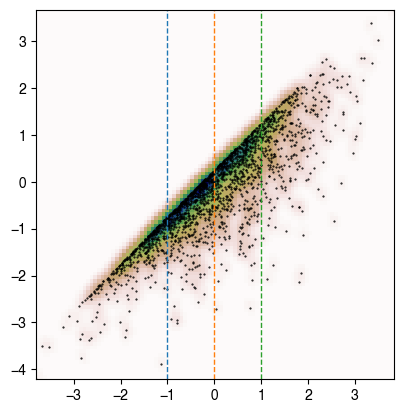

In [5]:
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.axvline(-1, ls='--', lw=1, color='C0')
ax.axvline(0, ls='--', lw=1, color='C1')
ax.axvline(1, ls='--', lw=1, color='C2')
plt.show()

#### Take conditional samples

Take 10,000 samples of y given x = -1, 0 and 1 respectively

In [6]:
x_cond = np.array([-1, 0,1])
x_cond

array([-1,  0,  1])

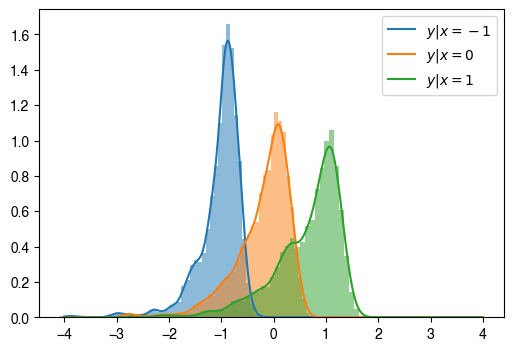

In [7]:
samples = kernel.conditional_resample(10000, x_cond=x_cond, dims_cond=[0])

fig, ax = plt.subplots(1, 1, figsize=(6,4))
xs = np.linspace(-4, 4, 1000)

for i in range(3):
    kde1d = kt.gaussian_kde(samples[i].ravel())
    ax.plot(xs, kde1d(xs), label=f'$y|x={x_cond[i]}$')
    ax.hist(samples[i].ravel(), density=True, bins=50, color=f'C{i}', alpha=0.5)
ax.legend();

#### Performance check

In [8]:
%timeit samples = kernel.conditional_resample(10000, x_cond=x_cond, dims_cond=[0])

1.95 ms ± 86.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
